In [13]:
from sklearn.datasets import load_diabetes, load_linnerud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:

# Установка стиля для графиков
sns.set(style="whitegrid")

# Загрузка датасетов
diabetes_data = load_diabetes(as_frame=True)
linnerud_data = load_linnerud(as_frame=True)

# Извлечение данных и целей
X_dia, y_dia = diabetes_data.data, diabetes_data.target
X_lin, y_lin = linnerud_data.data, linnerud_data.target

# Проверка первых нескольких строк
display(X_dia.head())
display(y_dia.head())
display(X_lin.head())
display(y_lin.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


Информация о датасете Diabetes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


None

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01



Информация о датасете Linnerud:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


None

,Chins,Situps,Jumps
count,20.000000,20.000000,20.00000
mean,9.450000,145.550000,70.30000
std,5.286278,62.566575,51.27747
min,1.000000,50.000000,25.00000
25%,4.750000,101.000000,39.50000
50%,11.500000,122.500000,54.00000
75%,13.250000,210.000000,85.25000
max,17.000000,251.000000,250.00000


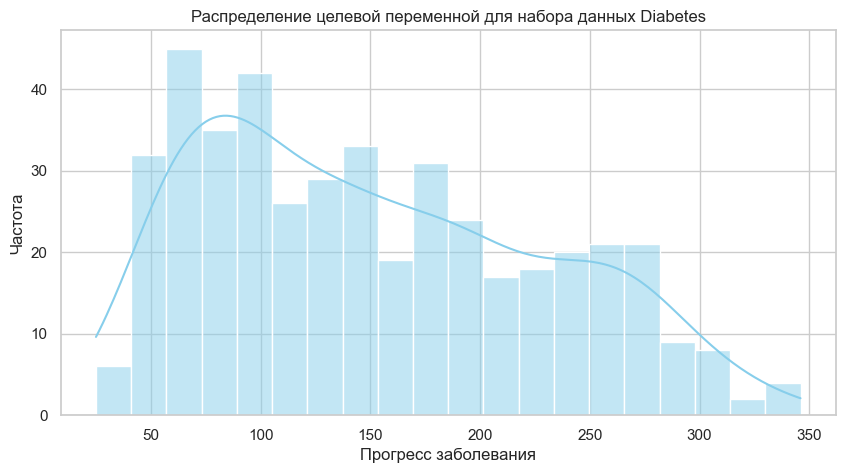

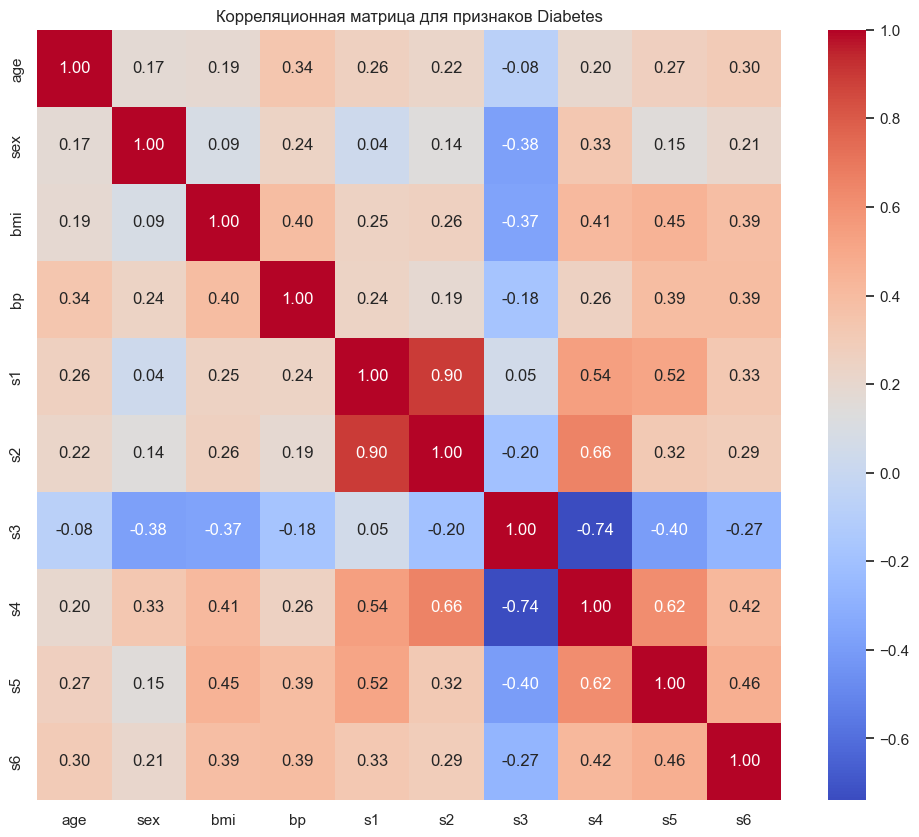

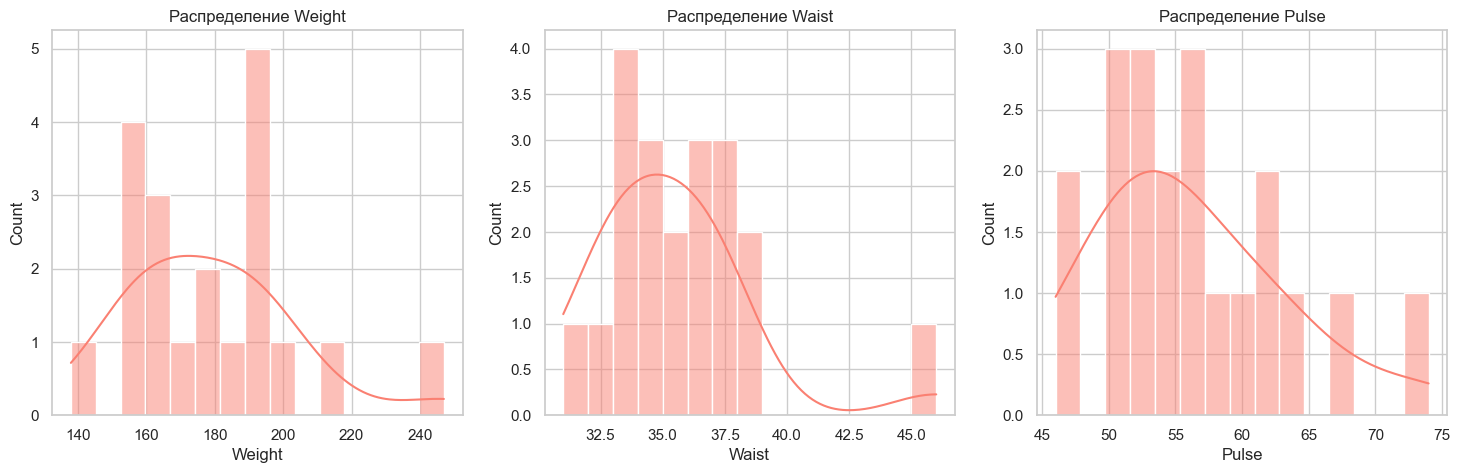

In [15]:
# Основная информация о датасетах
print("Информация о датасете Diabetes:")
display(X_dia.info())
display(X_dia.describe())

print("\nИнформация о датасете Linnerud:")
display(X_lin.info())
display(X_lin.describe())

# Распределение целевой переменной для набора данных Diabetes
plt.figure(figsize=(10, 5))
sns.histplot(y_dia, bins=20, kde=True, color="skyblue")
plt.title("Распределение целевой переменной для набора данных Diabetes")
plt.xlabel("Прогресс заболевания")
plt.ylabel("Частота")
plt.show()

# Построение корреляционной матрицы для Diabetes
plt.figure(figsize=(12, 10))
sns.heatmap(X_dia.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица для признаков Diabetes")
plt.show()

# Гистограммы целевых переменных для Linnerud
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(y_lin.columns):
    sns.histplot(y_lin[col], bins=15, kde=True, ax=axs[i], color="salmon")
    axs[i].set_title(f"Распределение {col}")
plt.show()

In [16]:
# Разделение данных на обучающую и тестовую выборки для Diabetes
X_dia_train, X_dia_test, y_dia_train, y_dia_test = train_test_split(X_dia, y_dia, test_size=0.2, random_state=42)

# Разделение данных для Linnerud (три целевые переменные)
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)


In [17]:
# Импорт моделей регрессии
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# Функция для оценки модели


def evaluate_model(model, X_train, y_train, X_test, y_test, target_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Модель: {model.__class__.__name__} для {target_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")
    return mse, r2


# Список моделей
models = [
    KNeighborsRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    LogisticRegression(max_iter=1000)
]

# Оценка моделей на данных Diabetes
print("Результаты для набора данных Diabetes:\n")
for model in models:
    evaluate_model(model, X_dia_train, y_dia_train, X_dia_test,
                   y_dia_test, target_name="Diabetes")

# Оценка моделей для каждого целевого показателя в наборе данных Linnerud
print("\nРезультаты для набора данных Linnerud:\n")
for i, target_name in enumerate(y_lin.columns):
    print(f"Целевая переменная: {target_name}")
    y_target_train, y_target_test = y_lin_train[target_name], y_lin_test[target_name]
    for model in models:
        evaluate_model(model, X_lin_train, y_target_train,
                       X_lin_test, y_target_test, target_name=target_name)

Результаты для набора данных Diabetes:

Модель: KNeighborsRegressor для Diabetes
Mean Squared Error (MSE): 3019.08
R^2 Score: 0.43

Модель: LinearRegression для Diabetes
Mean Squared Error (MSE): 2900.19
R^2 Score: 0.45

Модель: Ridge для Diabetes
Mean Squared Error (MSE): 3077.42
R^2 Score: 0.42

Модель: Lasso для Diabetes
Mean Squared Error (MSE): 3403.58
R^2 Score: 0.36

Модель: LogisticRegression для Diabetes
Mean Squared Error (MSE): 5691.91
R^2 Score: -0.07


Результаты для набора данных Linnerud:

Целевая переменная: Weight
Модель: KNeighborsRegressor для Weight
Mean Squared Error (MSE): 523.78
R^2 Score: -0.86

Модель: LinearRegression для Weight
Mean Squared Error (MSE): 630.78
R^2 Score: -1.24

Модель: Ridge для Weight
Mean Squared Error (MSE): 630.30
R^2 Score: -1.24

Модель: Lasso для Weight
Mean Squared Error (MSE): 613.57
R^2 Score: -1.18

Модель: LogisticRegression для Weight
Mean Squared Error (MSE): 1038.75
R^2 Score: -2.69

Целевая переменная: Waist
Модель: KNeighbors

c:\Users\User\Desktop\Laba\big_data_laba5\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\Desktop\Laba\big_data_laba5\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [18]:
from sklearn.model_selection import GridSearchCV

# Гиперпараметры для настройки
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Настройка и оценка для KNeighborsRegressor на данных Diabetes
print("Лучшие параметры для KNeighborsRegressor (Diabetes):")
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
knn_grid.fit(X_dia_train, y_dia_train)
print(knn_grid.best_params_)
evaluate_model(knn_grid.best_estimator_, X_dia_train, y_dia_train,
               X_dia_test, y_dia_test, target_name="Diabetes")

# Настройка и оценка для Ridge
print("Лучшие параметры для Ridge (Diabetes):")
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
ridge_grid.fit(X_dia_train, y_dia_train)
print(ridge_grid.best_params_)
evaluate_model(ridge_grid.best_estimator_, X_dia_train,
               y_dia_train, X_dia_test, y_dia_test, target_name="Diabetes")

# Настройка и оценка для Lasso
print("Лучшие параметры для Lasso (Diabetes):")
lasso_grid = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
lasso_grid.fit(X_dia_train, y_dia_train)
print(lasso_grid.best_params_)
evaluate_model(lasso_grid.best_estimator_, X_dia_train,
               y_dia_train, X_dia_test, y_dia_test, target_name="Diabetes")

Лучшие параметры для KNeighborsRegressor (Diabetes):
{'n_neighbors': 9}
Модель: KNeighborsRegressor для Diabetes
Mean Squared Error (MSE): 3082.94
R^2 Score: 0.42

Лучшие параметры для Ridge (Diabetes):
{'alpha': 0.1}
Модель: Ridge для Diabetes
Mean Squared Error (MSE): 2856.49
R^2 Score: 0.46

Лучшие параметры для Lasso (Diabetes):
{'alpha': 0.1}
Модель: Lasso для Diabetes
Mean Squared Error (MSE): 2798.19
R^2 Score: 0.47



(np.float64(2798.1934851697188), 0.4718547867276227)

# Сравнение результатов моделей для наборов данных Diabetes и Linnerud

Для удобства анализа результаты всех моделей для различных целевых переменных представлены в виде таблицы. Каждая модель была оценена по двум метрикам: **Mean Squared Error (MSE)** и **R^2 Score**.

## Результаты для набора данных Diabetes

| Модель                | MSE   | R^2 Score |
|-----------------------|-------|-----------|
| **KNeighborsRegressor** | 3019.08 | 0.43 |
| **LinearRegression**    | 2900.19 | 0.45 |
| **Ridge**               | 3077.42 | 0.42 |
| **Lasso**               | 3403.58 | 0.36 |
| **LogisticRegression**  | 5691.91 | -0.07 |

### Лучшие параметры для моделей на данных Diabetes:
- **KNeighborsRegressor:** `{'n_neighbors': 9}`
- **Ridge:** `{'alpha': 0.1}`
- **Lasso:** `{'alpha': 0.1}`

| Модель                | MSE   | R^2 Score |
|-----------------------|-------|-----------|
| **KNeighborsRegressor** | 3082.94 | 0.42 |
| **Ridge**               | 2856.49 | 0.46 |
| **Lasso**               | 2798.19 | 0.47 |

---

## Результаты для набора данных Linnerud

### Целевая переменная: **Weight**

| Модель                | MSE   | R^2 Score |
|-----------------------|-------|-----------|
| **KNeighborsRegressor** | 523.78 | -0.86 |
| **LinearRegression**    | 630.78 | -1.24 |
| **Ridge**               | 630.30 | -1.24 |
| **Lasso**               | 613.57 | -1.18 |
| **LogisticRegression**  | 1038.75 | -2.69 |

### Целевая переменная: **Waist**

| Модель                | MSE   | R^2 Score |
|-----------------------|-------|-----------|
| **KNeighborsRegressor** | 6.47  | -0.52 |
| **LinearRegression**    | 4.57  | -0.08 |
| **Ridge**               | 4.58  | -0.08 |
| **Lasso**               | 5.62  | -0.32 |
| **LogisticRegression**  | 10.50 | -1.47 |

### Целевая переменная: **Pulse**

| Модель                | MSE   | R^2 Score |
|-----------------------|-------|-----------|
| **KNeighborsRegressor** | 53.68 | -1.44 |
| **LinearRegression**    | 82.11 | -2.73 |
| **Ridge**               | 81.89 | -2.72 |
| **Lasso**               | 73.94 | -2.36 |
| **LogisticRegression**  | 110.00 | -4.00 |

---

# Сравнение моделей

1. **Набор данных Diabetes**:
   - **Лучшая модель:** `Lasso` с наименьшим значением MSE (2798.19) и наивысшим R^2 Score (0.47).
   - **Наихудшая модель:** `LogisticRegression` с наибольшим значением MSE (5691.91) и отрицательным R^2 Score (-0.07), что указывает на неадекватность данной модели для регрессионной задачи.

2. **Набор данных Linnerud**:
   - **Целевая переменная Weight:** `KNeighborsRegressor` показал наименьшее значение MSE (523.78), однако R^2 Score остаётся негативным, что свидетельствует о недостаточной точности модели для предсказания этого параметра.
   - **Целевая переменная Waist:** Лучшая модель здесь — `LinearRegression` с минимальным MSE (4.57) и менее отрицательным R^2 Score (-0.08), что демонстрирует некоторое улучшение предсказания по сравнению с другими моделями.
   - **Целевая переменная Pulse:** Лучшая модель — `Lasso` с наименьшим MSE (73.94) и наименьшим отрицательным значением R^2 Score (-2.36). Все модели показали очень низкие результаты, что говорит о сложности предсказания этой целевой переменной.

---

# Выводы

1. **Для набора данных Diabetes**:
   - Модели, такие как `LinearRegression` и `Lasso`, показали наилучшие результаты среди всех алгоритмов, с наименьшим MSE и наиболее положительными R^2 Score.
   - Модели, основанные на `LogisticRegression`, не подходят для регрессии и значительно уступают другим моделям.

2. **Для набора данных Linnerud**:
   - Все модели имеют проблемы с точностью, так как значения R^2 Score остаются отрицательными, что указывает на невозможность точного предсказания целевых переменных.
   - Несмотря на это, модели с параметрами `LinearRegression` и `KNeighborsRegressor` показали относительно лучшие результаты для переменной `Waist`, а `Lasso` и `KNeighborsRegressor` дали лучшие результаты для `Pulse`.

